In [3]:
import numpy as np
from numpy import linalg as la

import pandas as pd
from matplotlib import pyplot as plt

import scipy
from scipy.stats import norm
from scipy.stats import chi2
import scipy.optimize as opt
import scipy.integrate as integrate
from scipy import stats as sts

import math

_Thank you to Natasha, Matt, and Tim._

# Problem 1. {-}

## Part (a).

In [9]:
def p1a(ret=False):
    
    claims = np.loadtxt("clms.txt")

    w = 1/len(claims) * np.ones_like(claims)
    
    claims_t = claims[claims<800]
    w_t = 1/len(claims_t) * np.ones_like(claims_t)
    
    if ret: return claims, claims_t, w_t
    
    
    
    plt.hist(claims, density = True, bins = 1000, weights = w)
    plt.xlim(-500, claims.max())
    plt.show()
    
    
    
    plt.hist(claims_t, weights = w_t, bins = 100)
    plt.xlim(0,800)
    plt.show()
    
    

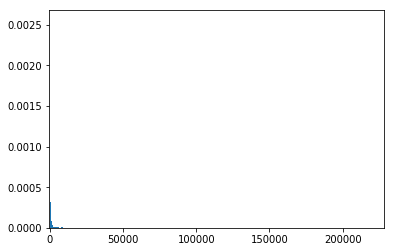

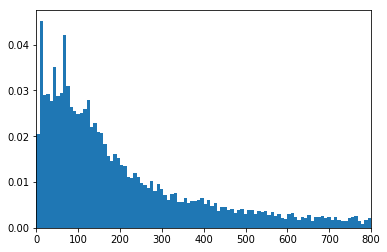

In [10]:
p1a()

## Part (b).

In [11]:
def p1b1(x,α,β):
    return (
    
        1 / (β**α * math.gamma(α)) * x**(α-1) * np.exp(-1*(x/β))
        
    )

In [12]:
def p1b2(args, x):
    
    α,β = args
    
    return -1*np.sum(np.log(p1b1(x,α,β)))
    

In [13]:
def p1b3(ret=False):
    
    claims, claims_t, w_t = p1a(ret = True)
    
    β_0 = np.var(claims) / np.mean(claims)
    α_0 = np.mean(claims) / β_0
    params_0 = [α_0, β_0]
    
    bounds = ((1e-5,None),(1e-5,None))
    optimized = opt.minimize(p1b2, params_0, args=claims, bounds=bounds)
    optimized_t = opt.minimize(p1b2,params_0,args=claims_t,bounds=bounds)
    
    α,β = optimized.x
    
    e = optimized.fun
    
    if ret: return e
    
    α_t, β_t = optimized_t.x
    
    X = np.linspace(1e-2, 800, 1000)
    
    grid = p1b1(X, α, β)
    grid_t = p1b1(X, α_t, β_t)
    
    plt.hist(claims_t, weights=w_t, bins=100)
    plt.plot(X,grid,label="MLE $\Gamma$-dist.")
    plt.plot(X,grid_t,label="MLE $\Gamma$-dist. (trimmed)")
    
    plt.xlim(0,800)
    plt.ylim(0,5e-2)
        
    plt.legend()
    plt.show()
    
    print(
    " •  α:  ",α,"\n",
    "•  β:  ",β,"\n\n",
    "•  α_t:",α_t,"\n",
    "•  β_t:",β_t    
    )

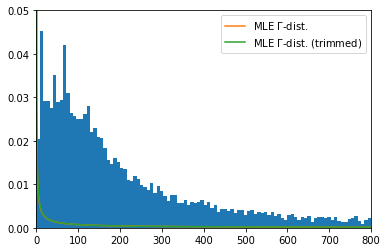

 •  α:   0.22175531882397229 
 •  β:   21911.06469927622 

 •  α_t: 0.20348864099178415 
 •  β_t: 21911.064699783838


In [14]:
p1b3()

## Part (c).

In [15]:
def p1c1(x,α,β,m):
    return (
        
        m/(β**α * math.gamma(α/m)) * x**(α-1)*np.exp(-1*(x/β)**m)
        
    )

In [16]:
def p1c2(args,x):
    α,β,m = args
    return -1*np.sum(np.log(p1c1(x,α,β,m)))

In [17]:
def p1c3(ret=False):
    claims, claims_t, w_t = p1a(ret = True)
    
    β_0 = np.var(claims) / np.mean(claims)
    α_0 = np.mean(claims) / β_0
    m_0 = 1
    
     params_0 = [α_0, β_0, m_0]
    
    b = (1e-5,None)
    bounds = (b,b,b)
    
    optimized = opt.minimize(p1c2, params_0, args=claims, bounds=bounds)
    optimized_t = opt.minimize(p1c2, params_0, args= claims_t, 
                               bounds = bounds)
    
    α,β,m = optimized.x
    
    e = optimized.fun
    
    if ret: return e
    
    α_t,β_t,m_t = optimized_t.x
    
    X = np.linspace(1e-2,800,1000)
    
    grid = p1c1(X,α,β,m)
    grid_t = p1c1(X,α_t,β_t,m_t)
    
    plt.hist(claims_t,weights = w_t, bins=100)
    plt.plot(X,grid,label="MLE GG dist.")
    plt.plot(X,grid_t,label = "MLE GG dist. (trimmed)")
    
    plt.xlim(0,800)
    plt.ylim(0,5e-2)
    
    plt.legend()
    plt.show()
    
    print(
    " •  α:  ",α,"\n",
    "•  β:  ",β,"\n",
    "•  m:  ",m,"\n\n",
    "•  α_t:",α_t,"\n",
    "•  β_t:",β_t,"\n",
    "•  m_t:",m_t
    )
    

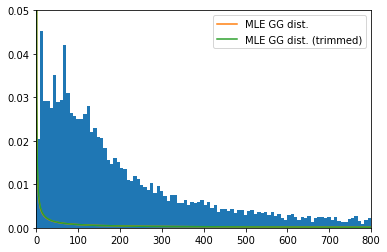

 •  α:   0.2217538681829344 
 •  β:   21911.064372887282 
 •  m:   0.9976836233858909 

 •  α_t: 0.2034851449617037 
 •  β_t: 21911.064638789405 
 •  m_t: 0.8868958758893984


In [18]:
p1c3()

## Part (d).

In [19]:
def p1d1(x,α,β,p,q):
    return(
    
        α*x**(α*p-1)/(β**(α*p)*scipy.special.beta(p,q)*(1+(x/β)**α)**(p+q))       
    )

In [20]:
def p1d2(args,x):
    α,β,p,q = args
    
    return -1 * np.sum(np.log(p1d1(x,α,β,p,q)))

In [21]:
def p1d3(ret=False):
    
    claims, claims_t, w_t = p1a(ret = True)
    
    β_0 = np.var(claims)/np.mean(claims)
    α_0 = np.mean(claims) / β_0
    p_0, q_0 = 1,1
    
    params_0 = [α_0,β_0,p_0,q_0]
    
    b = (1e-5,None)
    bounds = (b,b,b,b)
    
    optimized = opt.minimize(p1d2,params_0, args = claims, bounds = bounds)
    optimized_t = opt.minimize(p1d2, params_0, args=claims_t, bounds=bounds)
    
    α,β,p,q = optimized.x
    
    e = p1d2([α,β,p,q],claims)
    
    if ret: return e
    
    α_t,β_t,p_t,q_t = optimized_t.x
    
    X = np.linspace(1e-2,800,1000)
    
    grid = p1b1(X,α,β)
    grid_t = p1b1(X,α_t,β_t)
    
    plt.hist(claims_t,weights = w_t, bins=100)
    plt.plot(X,grid,label = "MLE GB2 dist.")
    plt.plot(X,grid_t,label = "MLE GB2 dist. (trimmed)")
    
    plt.xlim(0,800)
    plt.ylim(0,5e-2)
    
    plt.legend()
    plt.show()
    
    print(
    " •  α:  ",α,"\n",
    "•  β:  ",β,"\n",
    "•  p:  ",p,"\n",
    "•  q:  ",q,"\n\n"
    "•  α_t:",α_t,"\n",
    "•  β_t:",β_t,"\n",
    "•  p_t:",p_t,"\n",
    "•  q_t:",q_t,"\n\n",
    "•  e:  ",e
    )

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


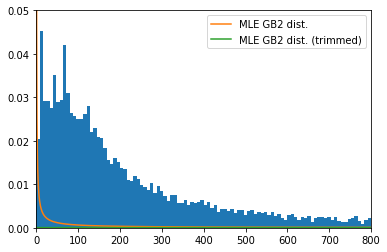

 •  α:   0.1076732352007127 
 •  β:   21911.069331861727 
 •  p:   61.5648216721421 
 •  q:   102.69247959910427 

•  α_t: 0.9787247608992424 
 •  β_t: 21911.05377033113 
 •  p_t: 1.1884189025004108 
 •  q_t: 120.13896050042712 

 •  e:   74861.6169378541


In [22]:
p1d3()

## Part (e).

In [23]:
def p1e():
    
    e_ga = p1b3(ret = True)
    e_gg = p1c3(ret = True)
    e_gb2 = p1d3(ret = True)
    
    lr_ga = 2*(np.log(e_gb2)-np.log(e_ga))
    lr_gg = 2*(np.log(e_gb2)-np.log(e_gg))
    
    p_ga = chi2.cdf(lr_ga, df = 4)
    p_gg = chi2.cdf(lr_gg, df = 4)
    
    print(
        " •  χ^2_GG:",p_gg,"\n",
         "•  χ^2_GA:",p_ga
    )

In [24]:
p1e()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


 •  χ^2_GG: 0.0 
 •  χ^2_GA: 0.0


# Problem 2. {-}

In [25]:
# Globals
SERIES = pd.read_csv("MacroSeries.txt",header=None)
SERIES.columns = ["c","k","w","r","y"]

## Part (a).

In [26]:
def p2a1(w,k,α):
    return np.log(w/((1-α)*k**α))

In [27]:
def p2a2(w,k,α,μ,σ,ρ):
    z = p2a1(w,k,α)
    val = 0
    for i in range(len(z)):
        if i == 0:
            pdf = norm.pdf(μ,loc=μ,scale=σ)
        else:
            pdf = norm.pdf(z[i],loc=(ρ*z[i-1]+(1-ρ)*μ),scale=σ)
        val+=np.log(pdf)
    return val

In [28]:
def p2a3(params,*args):
    α,μ,σ,ρ=params
    w,k=args
    return -1*p2a2(w,k,α,μ,σ,ρ)

In [43]:
def p2a4():
    params_0 = np.array([.4,.4,.4,.8])
    mle_args = (SERIES.w, SERIES.k)
    
    optimized = opt.minimize(p2a3,params_0,args=mle_args,
         method="L-BFGS-B",bounds=((1e-2,.99),(1e-2,None),(1e-2,None),
                               (-.99,.99)))
    
    α_mle,μ_mle,σ_mle,ρ_mle = optimized.x
    loglik_max = -1*optimized.fun
    
    vcv_ih = optimized.hess_inv.todense()
    
    print(
        " •  α_mle:",α_mle,"\n",
         "•  μ_mle:",μ_mle,"\n",
         "•  σ_mle:",σ_mle,"\n",
         "•  ρ_mle:",ρ_mle,"\n",
         "•  log likelihood max:",loglik_max,"\n",
         "•  inverse hessian of vcv:\n",vcv_ih
    )
    
    

In [44]:
p2a4()

 •  α_mle: 0.5534077576357248 
 •  μ_mle: 8.106499434665157 
 •  σ_mle: 0.09278026792905704 
 •  ρ_mle: 0.8246485429070475 
 •  log likelihood max: 95.85827569290834 
 •  inverse hessian of vcv:
 [[ 2.94783896e+00 -3.91105055e+01 -2.20282338e-01 -8.61238189e-01]
 [-3.91105055e+01  5.18902999e+02  2.92239258e+00  1.14268028e+01]
 [-2.20282338e-01  2.92239258e+00  1.66392463e-02  6.39042748e-02]
 [-8.61238189e-01  1.14268028e+01  6.39042748e-02  2.56555043e-01]]


## Part (b).

In [45]:
def p2b1(r,k,α):
    return np.log(r/(α*k**(α-1)))

In [46]:
def p2b2(r,k,α,μ,σ,ρ):
    z = p2b1(r,k,α)
    val = 0
    for i in range(len(z)):
        if i ==0 :
            pdf = norm.pdf(μ,loc=μ,scale=σ)
        else:
            pdf = norm.pdf(z[i],loc=(ρ*z[i-1]+(1-ρ)*μ),scale=σ)
        val += np.log(pdf)
    return val
    

In [47]:
def p2b3(params, *args):
    α,μ,σ,ρ=params
    r,k=args
    return -1*p2b2(r,k,α,μ,σ,ρ)
    

In [48]:
def p2b4():
    params_0 = np.array([.4,.4,.4,.8])
    mle_args = (SERIES.r, SERIES.k)
    optimized = opt.minimize(p2b3,params_0,args=mle_args,
         method= "L-BFGS-B",bounds=((1e-2,.99),(1e-2,None),(1e-2,None),
                                        (-.99,.99)))
    α_mle,μ_mle,σ_mle,ρ_mle=optimized.x
    loglik_max = -optimized.fun
    
    vcv_ih = -1*optimized.hess_inv.todense()
 
    print(
        " •  α_mle:",α_mle,"\n",
         "•  μ_mle:",μ_mle,"\n",
         "•  σ_mle:",σ_mle,"\n",
         "•  ρ_mle:",ρ_mle,"\n",
         "•  log likelihood max:",loglik_max,"\n",
         "•  inverse hessian of vcv:\n",vcv_ih
    )
    

In [49]:
p2b4()

 •  α_mle: 0.553376197472035 
 •  μ_mle: 7.56982093560222 
 •  σ_mle: 0.09278048277785769 
 •  ρ_mle: 0.8246601896600757 
 •  log likelihood max: 95.85827566348482 
 •  inverse hessian of vcv:
 [[-1.37999828e+02  2.40074534e+03  5.32604011e+00  4.43546900e+01]
 [ 2.40074534e+03 -4.17656334e+04 -9.26368535e+01 -7.72261481e+02]
 [ 5.32604011e+00 -9.26368535e+01 -2.06326662e-01 -1.68846120e+00]
 [ 4.43546900e+01 -7.72261481e+02 -1.68846120e+00 -1.50402824e+01]]


## Part (c).

In [50]:
def p2c1():
    params_0=np.array([.4,.4,.4,.8])
    mle_args = (SERIES.w,SERIES.k)
    optimized = opt.minimize(p2a3,params_0,args=mle_args,
 method="L-BFGS-B",bounds=((1e-2,.99),(1e-2,None),(1e-2,None),(-.99,.99)))
    return optimized.x
    

In [51]:
def p2c2(r,k,z_m1,params):
    α,μ,σ,ρ=params
    return 1-norm.cdf(p2b1(r,k,α),(ρ*z_m1+(1-ρ)*μ),σ)

In [52]:
def p2c3():
    print("Probability that the interest rate is greater than one:",
          p2c2(1,7_500_000,10,p2c1()))

In [53]:
p2c3()

Probability that the interest rate is greater than one: 1.0


# Problem 3. {-}

In [54]:
# Globals
INCOMES = pd.read_table("usincmoms.txt",header=None)
INCOMES.columns = ["Percent","Midpoint"]
INCOMES.Midpoint = INCOMES.Midpoint/1_000

## Part (a).

In [55]:
def p3a(ret=False):
    w=INCOMES.Percent.copy()
    w[41],w[40]=w[41]/20,w[40]/10
    bins=np.append(np.linspace(0,200,41),[250,350])
    
    if ret: return bins,w
    
    plt.hist(INCOMES.Midpoint, bins=bins, weights=w)
    
    plt.xlabel("Income, USD '000s")
    plt.title("U.S. Income Distribution")
    plt.show()

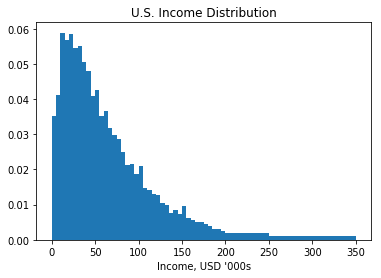

In [56]:
p3a()

## Part (b).

In [89]:
def p3b1(x,μ,σ):
    return (
    
    (1/(x*σ*np.sqrt(2*np.pi)))*np.exp(-1*((np.log(x)-μ)**2/(2*σ**2)))
    
    )

In [168]:
def p3b2(μ,σ):
    bins,w=p3a(ret=True)
    
    moments = np.zeros(len(bins)-1)
    
    for i in range(len(bins)-1):
        moments [i] = (integrate.quad(
        lambda x: p3b1(x,μ,σ),bins[i],bins[i+1])[0])
    return moments
          

In [91]:
def p3b3(dat,μ,σ,mode=False):
    modat = np.array(dat.Percent)
    model = p3b2(μ,σ)
    if mode: return model-modat
    else: return (model-modat)/modat
    

In [92]:
def p3b4(params,args):
    μ,σ=params
    dat,W=args
    e=p3b3(dat,μ,σ)
    return e.T@W@e

In [154]:
def p3b5(ret=False):
    
    bins,w = p3a(ret=True)
    
    μ_0 = np.log(np.sum(INCOMES.Percent*INCOMES.Midpoint))
    σ_0 = 3
    params_0=np.array([μ_0,σ_0])

    W=np.diag(INCOMES.Percent)
    gmm_args = np.array([INCOMES,W])

    optimized = opt.minimize(p3b4,params_0,args=gmm_args,method="L-BFGS-B",bounds=((None,None),(1e-10,None)))

    μ_gmm, σ_gmm = optimized.x
    
    X=np.linspace(1e-9,350,500)
    
    if ret: return optimized.fun,μ_gmm,σ_gmm
    
    plt.hist(INCOMES.Midpoint,bins=bins,weights=w)
    
    plt.xlabel("Income, USD '000s")
    plt.title("U.S. Income Distribution")
    
    plt.plot(X,5*p3b1(X,μ_gmm,σ_gmm),label="Lognorm")
    
    plt.legend()
    plt.show()

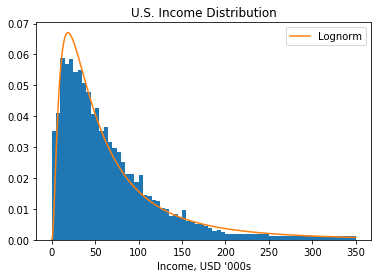

In [155]:
p3b5()

## Part (c).

In [103]:
def p3c1(x,α,β):
    return(
    
    1/(β**α*(math.gamma(α)))*x**(α-1)*np.exp(-(x/β))
    
    )

In [167]:

def p3c2(α,β):
    bins,w=p3a(ret=True)
    
    moments = np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        moments[i] = integrate.quad(lambda x: p3c1(x,α,β),bins[i],bins[i+1])[0]
    return moments

In [105]:
def p3c3(dat,α,β,mode=False):
    modat = np.array(INCOMES.Percent)
    model = p3c2(α,β)
    if mode: return model - modat
    else: return (model-modat) / modat

In [106]:
def p3c4(params, args):
    α,β=params
    dat,W=args
    
    e=p3c3(dat,α,β,mode=False)
    
    return e.T@W@e

In [153]:
def p3c5(ret=False):
    
    bins,w=p3a(ret=True)
    
    α_0,β_0=5,25
    params_0 = np.array([α_0,β_0])
    
    W=np.diag(INCOMES.Percent)
    gmm_args = np.array([INCOMES,W])
    
    optimized = opt.minimize(p3c4,params_0,method="L-BFGS-B",
         args=gmm_args,bounds=((1e-10,None),(1e-10,None)))
    
    α_gmm,β_gmm = optimized.x
    
    X = np.linspace(1e-9, 350, 500)
    
    if ret: return optimized.fun, α_gmm, β_gmm
    
    plt.hist(INCOMES.Midpoint, bins= bins, weights=w)
    
    plt.xlabel("Income, USD '000s")
    plt.title("U.S. Income Distribution")
    
    plt.plot(X,5*p3c1(X,α_gmm,β_gmm),label="$\Gamma$")
    
    plt.legend()
    plt.show()

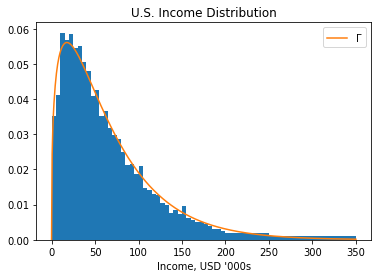

In [156]:
p3c5()

## Part (d).

In [164]:
def p3d():
    
    ge, α_gmm, β_gmm = p3c5(ret=True)
    lne, μ_gmm, σ_gmm = p3b5(ret=True)
    
    bins,w=p3a(ret=True)
    
    X = np.linspace(1e-9,350,500)
    
    plt.hist(INCOMES.Midpoint,bins=bins,weights=w)
    
    plt.xlabel("Income, USD '000s")
    plt.title("U.S. Income Distribution")
    
    plt.plot(X,5*p3b1(X,μ_gmm,σ_gmm),label="Lognorm")
    plt.plot(X,5*p3c1(X,α_gmm,β_gmm),label="$\Gamma$")

    plt.legend()
    plt.show()
    
    print( "Gamma and Lognorm errors:", ge, lne)

    return ge, lne

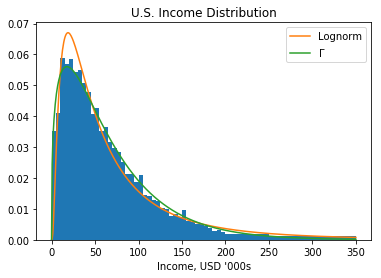

Gamma and Lognorm errors: 0.014084919474147941 0.03551648133439868


(0.014084919474147941, 0.03551648133439868)

In [166]:
p3d()

## Part (e).

In [174]:
def p3e1(α,β):
    
    bins,w=p3a(ret=True)
    
    moments = np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        moments[i] = integrate.quad(lambda x: p3c1(x,α,β),bins[i],bins[i+1])[0]
    return moments

In [175]:
def p3e2(dat,α,β,mode=False):
    modat = np.array(INCOMES.Percent)
    model = p3e1(α,β)
    if mode: return model - modat
    else: return (model-modat)/modat

In [176]:
def p3e3(params, args):
    α,β=params
    dat,W=args
    e=p3e2(dat,α,β,mode=False)
    return e.T@W@e

In [195]:
def p3e4():
    
    bins,w=p3a(ret=True)

    α_0,β_0 = 1.1, 50
    
    params_0 = np.array([α_0,β_0])
    
    ge, α_gmm_0, β_gmm_0 = p3c5(ret=True)
    e=p3e2(INCOMES,α_gmm_0,β_gmm_0)
    
    vcv=np.outer(e.T,e)
    W=la.pinv(vcv)
    
    gmm_args = np.array([INCOMES,W])
    
    optimized = opt.minimize(p3e3,params_0,args=gmm_args, bounds=((1e-10,None),(1e-10,None)))
    
    α_gmm,β_gmm = optimized.x
    
    X=np.linspace(1e-9,350,500)
    
    plt.hist(INCOMES.Midpoint, bins=bins, weights=w)
        
    plt.xlabel("Income, USD '000s")
    plt.title("U.S. Income Distribution")
    
    plt.plot(X,5*p3c1(X,α_gmm,β_gmm),label="$\Gamma$")

    plt.legend()
    plt.show()
    
    return optimized.fun

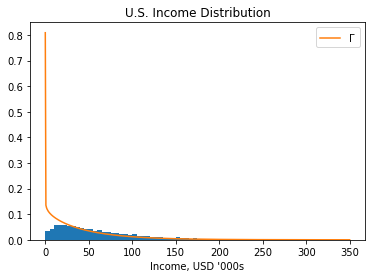

2.2526548410291274e-17

In [196]:
p3e4()

Something seems to have gone wrong here. Not sure what.

# Problem 4. {-}

In [207]:
# Globals
SERIES = pd.read_csv("MacroSeries.txt",header=None)
SERIES.columns = ["c","k","w","r","y"]

In [208]:
def p41(w,k,α):
    return(
    
    np.log(w/((1-α)*k**α))
        
    )

In [209]:
def p42(z_p1,z,ρ,μ):
    return(
    
    z_p1 - ρ * z - (1-ρ) * μ
    
    )

In [210]:
def p43(z_p1,z,ρ,μ):
    return(
    
    (z_p1 - ρ * z - (1-ρ) * μ ) * z
        
    )

In [227]:
def p44(z_p1,β,α,k_p1,c,c_p1):
    return(
    
    β*α*np.exp(z_p1) * k_p1 ** (α-1) * (c/c_p1) - 1
    
    )

In [228]:
def p45(z_p1,β,α,k_p1,c,c_p1,w):
    return(
    
    (β*α*np.exp(z_p1)*k_p1**(α-1)*(c/c_p1)-1)*w
        
    )

In [229]:
def p46(params, dat):

    α,β,ρ,μ = params
    z =       p41(dat.w,dat.k,α)[1:]
    z_p1 =    p41(dat.w,dat.k,α)[:-1]
    k =       dat.k[1:]
    k_p1 =    dat.k[:-1]
    w =       dat.w[1:]
    c =       dat.c[1:]
    c_p1 =    dat.c[:-1]
        
    return (np.array([np.mean(p42(z_p1,z,ρ,μ)), 
                      np.mean(p43(z_p1,z,ρ,μ)), 
                      np.mean(p44(z_p1,β,α,k_p1,c,c_p1)), 
                      np.mean(p45(z_p1,β,α,k_p1,c,c_p1,w))
                     ]))

In [230]:
def p47(params,dat,mode=True):
    
    model = np.zeros(4)
    modat = p46(params,dat)    
    
    if mode: return model-modat
    else: return (model-modat)/modat


In [231]:
def p48(params, args):
    
    dat,W = args
    
    e = p47(params,dat)
    
    return e.T@W@e


In [234]:
def p49():

    α,β,μ,ρ  = .4,.9,15,.9 # guesses
    params_0 = (α,β,μ,ρ)
    
    W=np.eye(4)
    
    args=[SERIES,W]

    optimized=opt.minimize(p48,params_0,args=args,method="L-BFGS-B",
                   bounds=((1e-10,1),(1e-10,1),(1e-10,None),(-1,1)))

    print(p46(optimized.x,SERIES),"\n")
    
    α_1,β_1,ρ_1,μ_1=optimized.x
    e=optimized.fun
    
    print(
        " •  α:",α_1,"\n",
         "•  β:",β_1,"\n",
         "•  ρ:",ρ_1,"\n",
         "•  μ:",μ_1,"\n",
         "•  e:",e
    )

In [235]:
p49()

[ 0.35975077  3.52260775 -0.00609967  1.94523833] 

 •  α: 0.4320475665588142 
 •  β: 0.9357322335853419 
 •  ρ: 0.9590620852936956 
 •  μ: 1.0 
 •  e: 16.32217535688303
